Dataset shape: (150, 4)

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


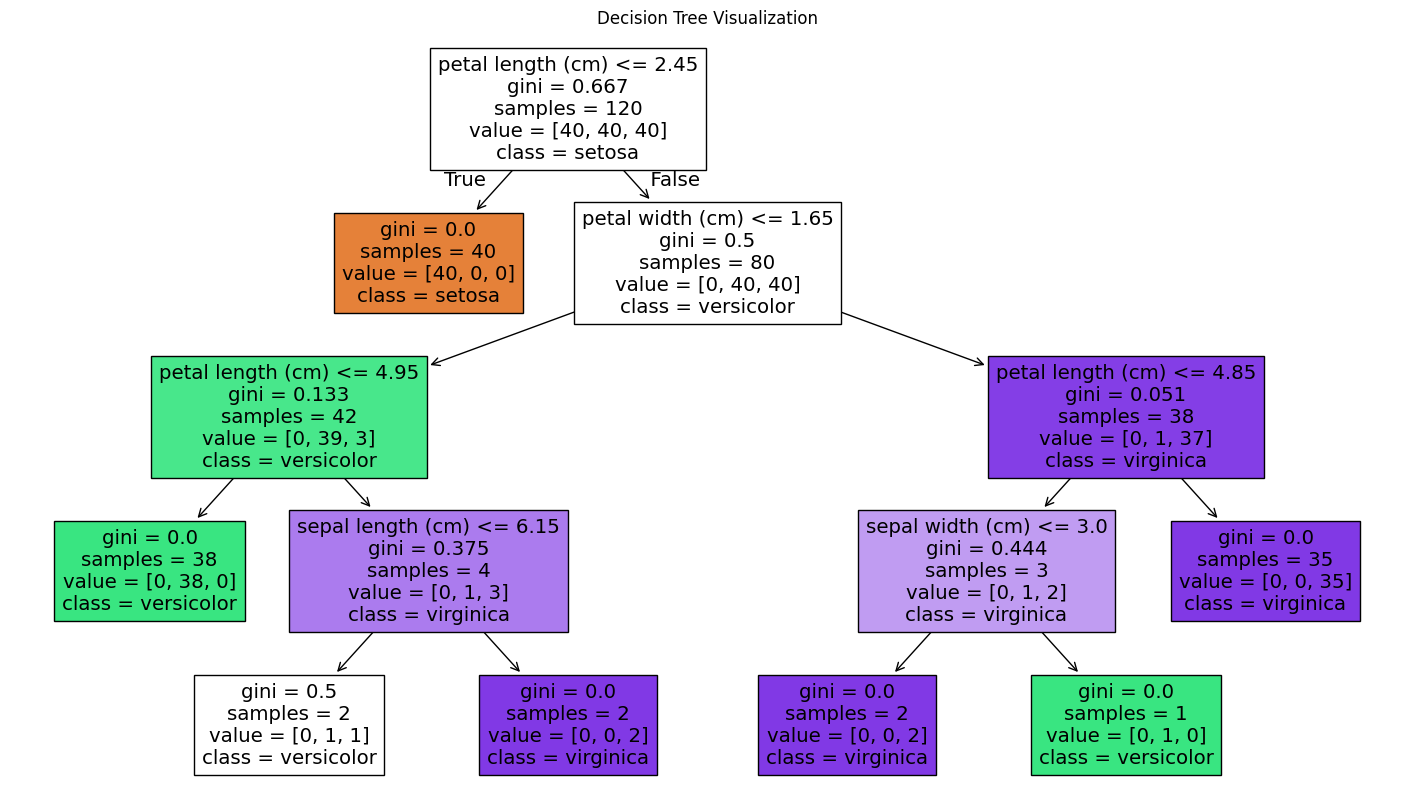


Feature Importance:
              Feature  Importance
2  petal length (cm)    0.565639
3   petal width (cm)    0.411154
1   sepal width (cm)    0.016878
0  sepal length (cm)    0.006329

Model saved as decision_tree_model.pkl

Predicted Class: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# 2. LOAD DATASET
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset shape:", X.shape)


# 3. DATA PREPROCESSING
# Check missing values
print("\nMissing values:\n", X.isnull().sum())

# Encode target if needed
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)


# 4. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 5. MODEL + HYPERPARAMETER TUNING
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)


# 6. TRAIN FINAL MODEL
best_model.fit(X_train, y_train)


# 7. PREDICTIONS
y_pred = best_model.predict(X_test)


# 8. MODEL EVALUATION
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# 9. DECISION TREE VISUALIZATION
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()


# 10. FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)


# 11. SAVE MODEL
joblib.dump(best_model, "decision_tree_model.pkl")
print("\nModel saved as decision_tree_model.pkl")


# 12. LOAD MODEL
loaded_model = joblib.load("decision_tree_model.pkl")


# 13. NEW DATA PREDICTION
new_sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = loaded_model.predict(new_sample)

print("\nPredicted Class:", data.target_names[prediction][0])
